In [32]:
# Nombre: Luis Valencia

# Instalamos tensorflow, keras e importamos las libreria 
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from tensorflow.python.keras.models import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [40]:
# Cargamos las imagenes del directorio "sportimages de forma local"
dirname = os.path.join(os.getcwd(), 'sportimages')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\analisis2021b\sportimages\
C:\analisis2021b\sportimages\americano 1
C:\analisis2021b\sportimages\basket 9348
C:\analisis2021b\sportimages\beisball 8823
C:\analisis2021b\sportimages\boxeo 7752
C:\analisis2021b\sportimages\ciclismo 7125
C:\analisis2021b\sportimages\f1 7533
C:\analisis2021b\sportimages\futbol 5053
C:\analisis2021b\sportimages\golf 7617
C:\analisis2021b\sportimages\natacion 9768
C:\analisis2021b\sportimages\tenis 5172
Directorios leidos: 10
Imagenes en cada directorio [9349, 8823, 7752, 7125, 7533, 5053, 7617, 9768, 5172, 8936]
suma Total de imagenes en subdirs: 77128


In [41]:
# Creamos las etiquetas y las clases
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  77128
0 americano
1 basket
2 beisball
3 boxeo
4 ciclismo
5 f1
6 futbol
7 golf
8 natacion
9 tenis
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [46]:
# importamos LeakyRelo de keras
from keras.layers import LeakyReLU

In [47]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)
 
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Cramos sets de entrenamiento y test
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
 
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (61702, 21, 28, 3) (61702,)
Testing data shape :  (15426, 21, 28, 3) (15426,)
Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(49361, 21, 28, 3) (12341, 21, 28, 3) (49361, 10) (12341, 10)


In [48]:
# Creamos el modelo
INIT_LR = 1e-3
epochs = 6
batch_size = 64
 
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))
 
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5)) 
sport_model.add(Dense(nClasses, activation='softmax'))
 
sport_model.summary()
 
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4928)              0         
                                                                 
 dense (Dense)               (None, 32)                157728    
                                                        

C:\Users\lisbe\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [50]:
sport_train_dropout = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
 
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("sports_mnist.h5py")

Epoch 1/6
772/772 [==============================] - 118s 153ms/step - loss: 1.2243 - accuracy: 0.6029 - val_loss: 0.9716 - val_accuracy: 0.7720
Epoch 2/6
772/772 [==============================] - 105s 136ms/step - loss: 1.1702 - accuracy: 0.6205 - val_loss: 0.9163 - val_accuracy: 0.7816
Epoch 3/6
772/772 [==============================] - 104s 134ms/step - loss: 1.1233 - accuracy: 0.6418 - val_loss: 0.8678 - val_accuracy: 0.7952
Epoch 4/6
772/772 [==============================] - 103s 134ms/step - loss: 1.0811 - accuracy: 0.6524 - val_loss: 0.8270 - val_accuracy: 0.8072
Epoch 5/6
772/772 [==============================] - 107s 139ms/step - loss: 1.0503 - accuracy: 0.6641 - val_loss: 0.7984 - val_accuracy: 0.8050
Epoch 6/6
772/772 [==============================] - 111s 143ms/step - loss: 1.0256 - accuracy: 0.6747 - val_loss: 0.7697 - val_accuracy: 0.8195


INFO:tensorflow:Assets written to: sports_mnist.h5py\assets


INFO:tensorflow:Assets written to: sports_mnist.h5py\assets


In [53]:
# EVALUAMOS LA RED
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

483/483 [==============================] - 14s 28ms/step - loss: 0.7619 - accuracy: 0.8178
Test loss: 0.7619392275810242
Test accuracy: 0.8177751898765564


In [56]:
predicted_classes2 = sport_model.predict(test_X)
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

predicted_classes.shape, test_Y.shape

483/483 [==============================] - 13s 25ms/step


((15426,), (15426,))

Found 12615 correct labels


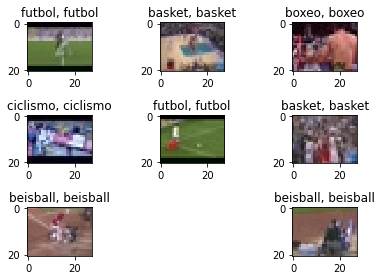

In [57]:
# APRENDEMOS QUE ERRORES MEJORAR
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 2811 incorrect labels


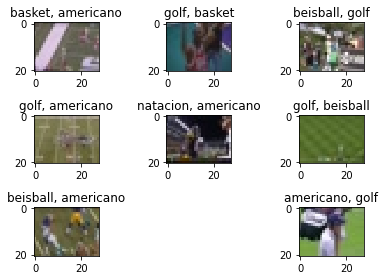

In [58]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [59]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.64      0.57      0.60      1891
     Class 1       0.80      0.90      0.84      1742
     Class 2       0.79      0.71      0.75      1511
     Class 3       0.81      0.91      0.86      1460
     Class 4       0.97      0.99      0.98      1493
     Class 5       0.89      0.30      0.45      1040
     Class 6       0.89      0.84      0.86      1502
     Class 7       0.67      0.90      0.77      1920
     Class 8       0.93      0.93      0.93      1052
     Class 9       0.97      1.00      0.99      1815

    accuracy                           0.82     15426
   macro avg       0.84      0.80      0.80     15426
weighted avg       0.82      0.82      0.81     15426

